In [1]:
import numpy as np
import bisect

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from pixel3d import Pixel3D

In [3]:
from topologicalunionfind import TopologicalUnionFind

In [4]:
from voidsfinding import VoidsFinding

### Reading Cube

In [182]:
binary = np.fromfile('../simulation/v6.0.0_original_map.bin')
binary.shape

(75168,)

In [183]:
cube_shape = (24, 27, 116)

In [184]:
cube = binary.reshape(cube_shape)
cube.shape

(24, 27, 116)

### diagonal = False

In [185]:
reverse = True
diagonal = False

In [186]:
vf = VoidsFinding(cube, reverse, diagonal)

In [187]:
vf.findVoidsUF()

In [188]:
persistenceUF_raw1 = vf.getPersistenceUF()[1:]

In [189]:
persistenceUF1 = [(birth, death) for birth, death in persistenceUF_raw1 if death - birth > 0.8 and death]

### Reading Cube

In [190]:
binary = np.fromfile('../real/real_original_map.bin')
binary.shape

(86976,)

In [191]:
cube_shape = (24, 24, 151)

In [192]:
cube = binary.reshape(cube_shape)
cube.shape

(24, 24, 151)

### diagonal = False

In [193]:
reverse = True
diagonal = False

In [194]:
vf = VoidsFinding(cube, reverse, diagonal)

In [195]:
vf.findVoidsUF()

In [196]:
persistenceUF_raw2 = vf.getPersistenceUF()[1:]

In [197]:
persistenceUF2 = [(birth, death) for birth, death in persistenceUF_raw2 if death - birth > 0.8 and death]

### Plot

In [198]:
sns.set()

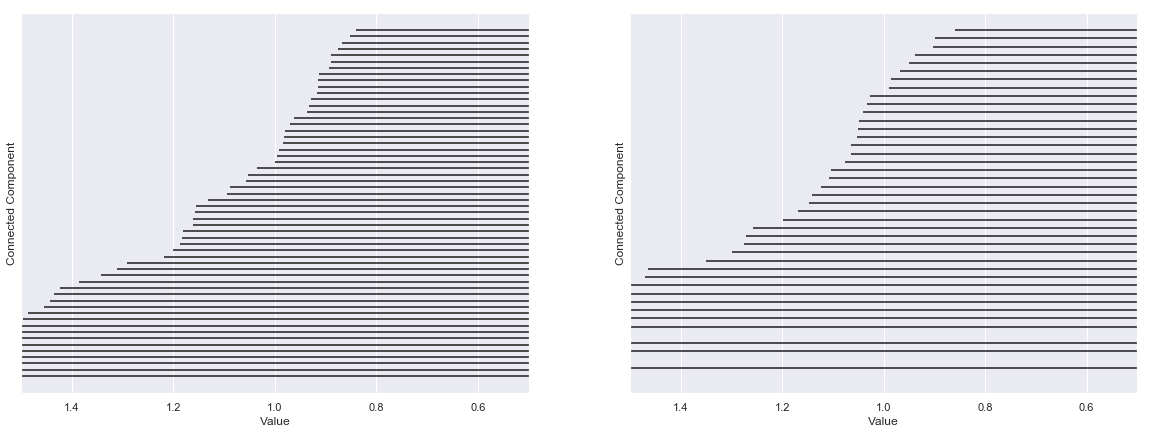

In [199]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,7))

# left
y = np.arange(0, len(persistenceUF1))
xmin = [birth for birth, death in persistenceUF1]
xmax = [death for birth, death in persistenceUF1]
if reverse:
    xlim = (max(xmax), min(xmin))
else:
    xlim = (min(xmin), max(xmax))

ax[0].hlines(y=y, xmin=xmin, xmax=xmax)
ax[0].set_yticks([])
ax[0].set_xlim(1.5, 0.5)
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Connected Component')

# right
y = np.arange(0, len(persistenceUF2))
xmin = [birth for birth, death in persistenceUF2]
xmax = [death for birth, death in persistenceUF2]
if reverse:
    xlim = (max(xmax), min(xmin))
else:
    xlim = (min(xmin), max(xmax))

ax[1].hlines(y=y, xmin=xmin, xmax=xmax)
ax[1].set_yticks([])
ax[1].set_xlim(1.5, 0.5)
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Connected Component')
plt.show()

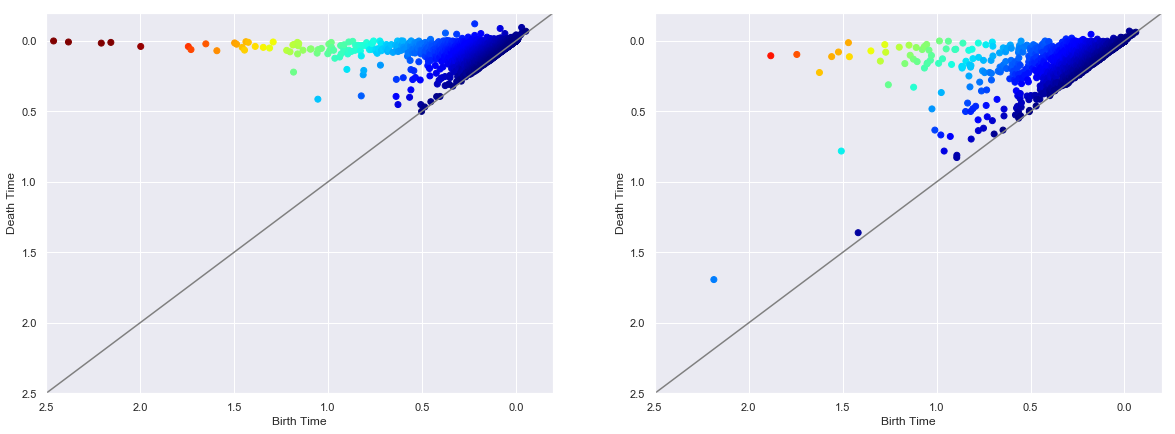

In [203]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,7))

# left
xmin = [birth for birth, death in persistenceUF_raw1]
xmax = [death for birth, death in persistenceUF_raw1]
if reverse:
    xlim = (max(xmax)+1, min(xmin)-1)
    xmin, xmax = xmax, xmin
else:
    xlim = (min(xmin)-1, max(xmax)+1)
ax[0].scatter(xmin, xmax, c=abs(np.array(xmax)-np.array(xmin)), cmap='jet', vmax=2)
ax[0].set_xlim(2.5, -0.2)
ax[0].set_ylim(2.5, -0.2)
ax[0].set_xlabel('Birth Time')
ax[0].set_ylabel('Death Time')
ax[0].plot([xlim[0], xlim[1]], [xlim[0], xlim[1]], c='grey')

# right
xmin = [birth for birth, death in persistenceUF_raw2]
xmax = [death for birth, death in persistenceUF_raw2]
if reverse:
    xlim = (max(xmax)+1, min(xmin)-1)
    xmin, xmax = xmax, xmin
else:
    xlim = (min(xmin)-1, max(xmax)+1)
ax[1].scatter(xmin, xmax, c=abs(np.array(xmax)-np.array(xmin)), cmap='jet', vmax=2)
ax[1].set_xlim(2.5, -0.2)
ax[1].set_ylim(2.5, -0.2)
ax[1].set_xlabel('Birth Time')
ax[1].set_ylabel('Death Time')
ax[1].plot([xlim[0], xlim[1]], [xlim[0], xlim[1]], c='grey')

# plt.colorbar()

plt.show()

In [64]:
y = np.arange(0, len(persistenceUF1))
xmin = [birth for birth, death in persistenceUF1]
xmax = [death for birth, death in persistenceUF1]
if reverse:
    xlim = (max(xmax), min(xmin))
else:
    xlim = (min(xmin), max(xmax))

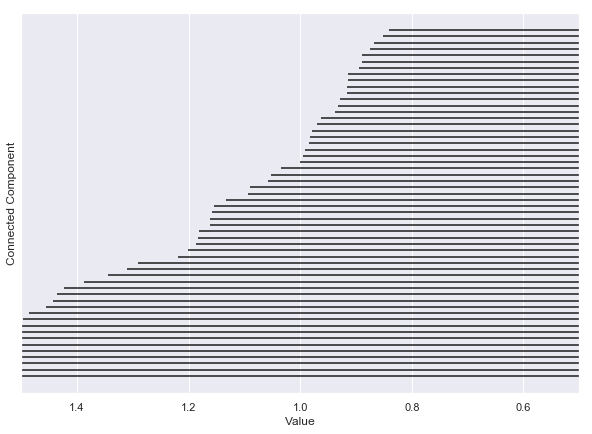

In [65]:
sns.set()
plt.figure(figsize=(10,7))
plt.hlines(y=y, xmin=xmin, xmax=xmax)
plt.yticks([])
plt.xlim(1.5, 0.5)
plt.xlabel('Value')
plt.ylabel('Connected Component')
plt.show()

In [66]:
persistenceUF = persistenceUF_raw

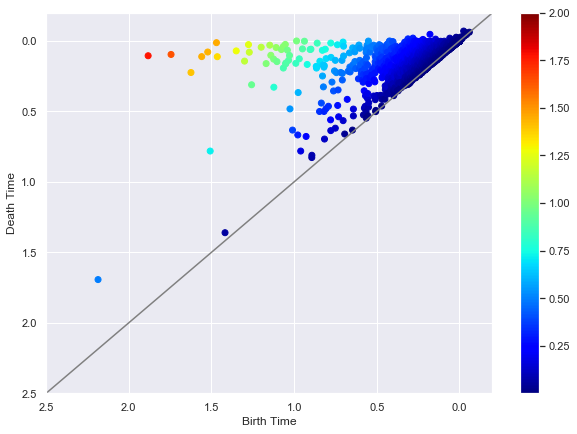

In [104]:
xmin = [birth for birth, death in persistenceUF]
xmax = [death for birth, death in persistenceUF]
if reverse:
    xlim = (max(xmax)+1, min(xmin)-1)
    xmin, xmax = xmax, xmin
else:
    xlim = (min(xmin)-1, max(xmax)+1)
plt.figure(figsize=(10,7))
plt.scatter(xmin, xmax, c=abs(np.array(xmax)-np.array(xmin)), cmap='jet', vmax=2)
plt.xlim(2.5, -0.2)
plt.ylim(2.5, -0.2)
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator())
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator())
plt.xlabel('Birth Time')
plt.ylabel('Death Time')
plt.plot([xlim[0], xlim[1]], [xlim[0], xlim[1]], c='grey')
plt.colorbar()
plt.show()

In [93]:
y = np.arange(0, len(persistenceUF))
xmin = [birth for birth, death in persistenceUF]
xmax = [death for birth, death in persistenceUF]
if reverse:
    xlim = (max(xmax), min(xmin))
else:
    xlim = (min(xmin), max(xmax))

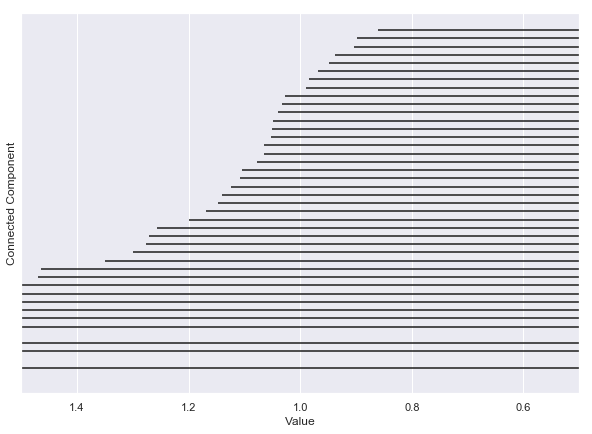

In [97]:
sns.set()
plt.figure(figsize=(10,7))
plt.hlines(y=y, xmin=xmin, xmax=xmax)
plt.yticks([])
plt.xlim(1.5, 0.5)
plt.xlabel('Value')
plt.ylabel('Connected Component')
plt.show()

In [98]:
persistenceUF = persistenceUF_raw

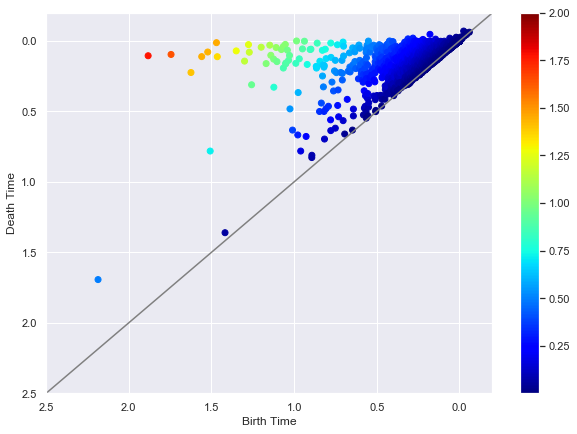

In [105]:
xmin = [birth for birth, death in persistenceUF]
xmax = [death for birth, death in persistenceUF]
if reverse:
    xlim = (max(xmax)+1, min(xmin)-1)
    xmin, xmax = xmax, xmin
else:
    xlim = (min(xmin)-1, max(xmax)+1)
plt.figure(figsize=(10,7))
plt.scatter(xmin, xmax, c=abs(np.array(xmax)-np.array(xmin)), cmap='jet', vmax=2)
plt.xlim(2.5, -0.2)
plt.ylim(2.5, -0.2)
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator())
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator())
plt.xlabel('Birth Time')
plt.ylabel('Death Time')
plt.plot([xlim[0], xlim[1]], [xlim[0], xlim[1]], c='grey')
plt.colorbar()
plt.show()